# Machine Learning

## Overview

Machine learning is the ability of computers to take a dataset of objects and learn patterns about them. This dataset is structured as a table, where each row is a vector representing some object by encoding their properties as the values of the vector. The columns represent **features** - properties that all the objects share.

There are, broadly speaking, two kinds of machine learning. **Supervised learning** has an extra column at the end of the dataset, and the program learns to predict the value of this based on the input features for some new object. If the output value is continuous, it is **regression**, otherwise it is **classification**. **Unsupervised learning** seeks to find patterns within the data by, for example, clustering.

![Machine Learning Overview](img/machine-learning-overview.png)

## Supervised Learning

One of the most critical concepts in supervised learning is the dataset. This represents the knowledge about the set of objects in question that you wish the machine to learn. It is essentially a table where the rows represent objects, and the columns represent the properties. 'Training' is essentially the creation of an object called a model, which can take a row missing the last column, and predict what its value will be by examining the data in the dataset. For example...

In [1]:
import pandas as pd
iris_dataset = pd.read_csv("../data/iris.csv")
iris_dataset.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Here a dataset has been loaded from CSV into a pandas dataframe. Each row represents a flower, on which four measurements have been taken, and each flower belongs to one of three classes. A supervised learning model would take this dataset of 150 flowers and train such that any other flower for which the relevant measurements were known could have its class predicted. This would obviously be a classification problem, not regression.

A very simple model would take just two features and map them to one of two classes. The dataset can be reduced to this form asd follows:

In [2]:
simple_iris = iris_dataset.iloc[0:100, [0, 2, 4]]
simple_iris.head()
simple_iris.tail()

,Sepal length,Petal length,Class
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor
99,5.7,4.1,Iris-versicolor


Because this is just two dimensions, it can be easily visualised as a scatter plot.

In [3]:
import sys
sys.path.append("..")
import numerus.learning as ml
ml.plot_dataset(simple_iris)

<Figure size 640x480 with 1 Axes>

The data can be seen to be **linearly separable** - there is a line that can be drawn between them that would separate them perfectly.

One of the simplest classifiers for supervised learning is the perceptron. Perceptrons have a weights vector which they dot with an input vector to get some level of activation. If the activation is above some threshold, one class is predicted - otherwise the other is predicted. Training a perceptron means giving the model training inputs until it has values for the weights and threshold that effectively separate the classes.

The data must be split into training and test data, and then a perceptron created from the training data.

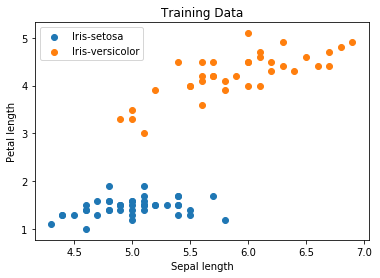

<2-dimensional Perceptron (0-[1 1])>


In [4]:
train_simple_iris, test_simple_iris = ml.split_data(simple_iris)
ml.plot_dataset(train_simple_iris, title="Training Data")
perceptron = ml.Perceptron(train_simple_iris)
print(perceptron)